# TASK #1: PROJECT OVERVIEW

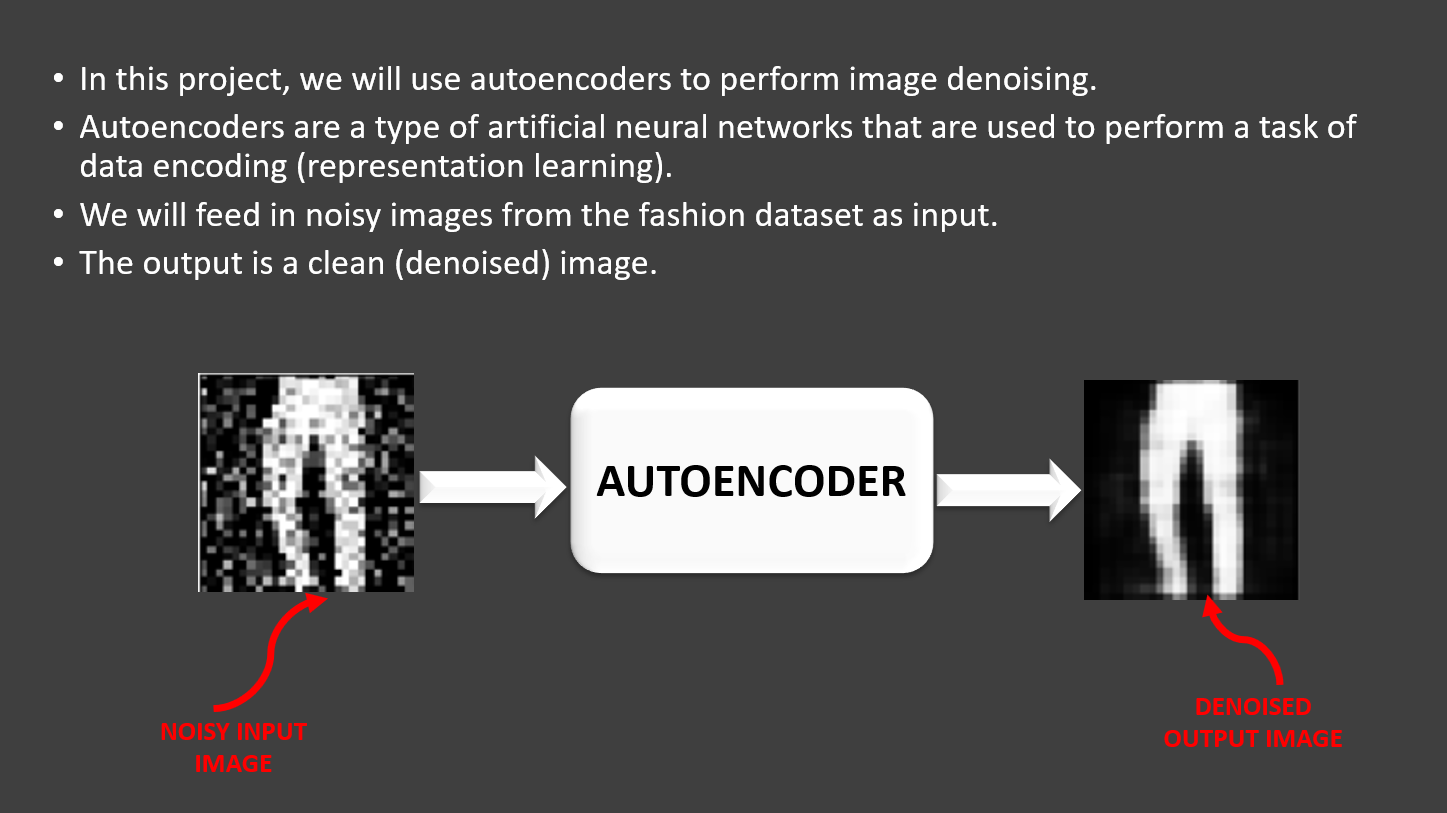

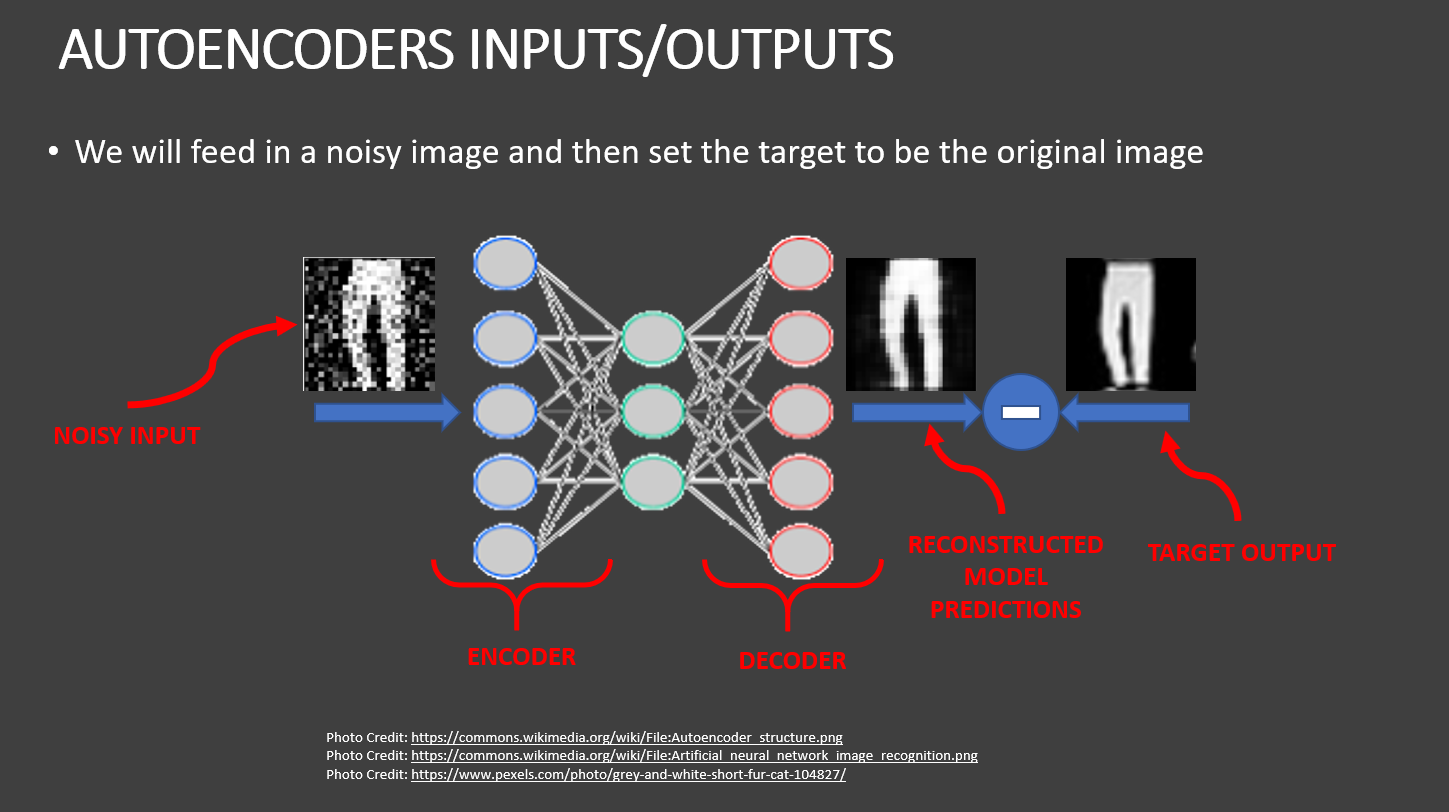

# TASK #2: IMPORT LIBRARIES AND DATASET

In [7]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import random

In [8]:
# Load dataset 
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 7s 2us/step


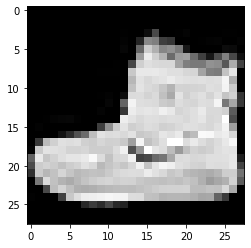

In [11]:
# Visualize a sample image
plt.imshow(X_train[0], cmap='gray')

In [12]:
# check out the shape of the training data

X_train.shape

(60000, 28, 28)

In [13]:
# check out the shape of the testing data
X_test.shape

(10000, 28, 28)

In [14]:
y_train.shape

(60000,)

In [15]:
y_test.shape

(10000,)

# TASK #3: PERFORM DATA VISUALIZATION

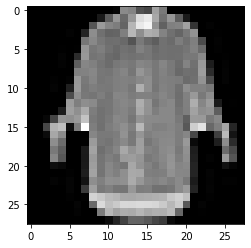

In [17]:
# Let's view some images!
i = random.randint(0, X_train.shape[0])
plt.imshow(X_train[i], cmap='gray')

In [18]:
label = y_train[i]
label

6

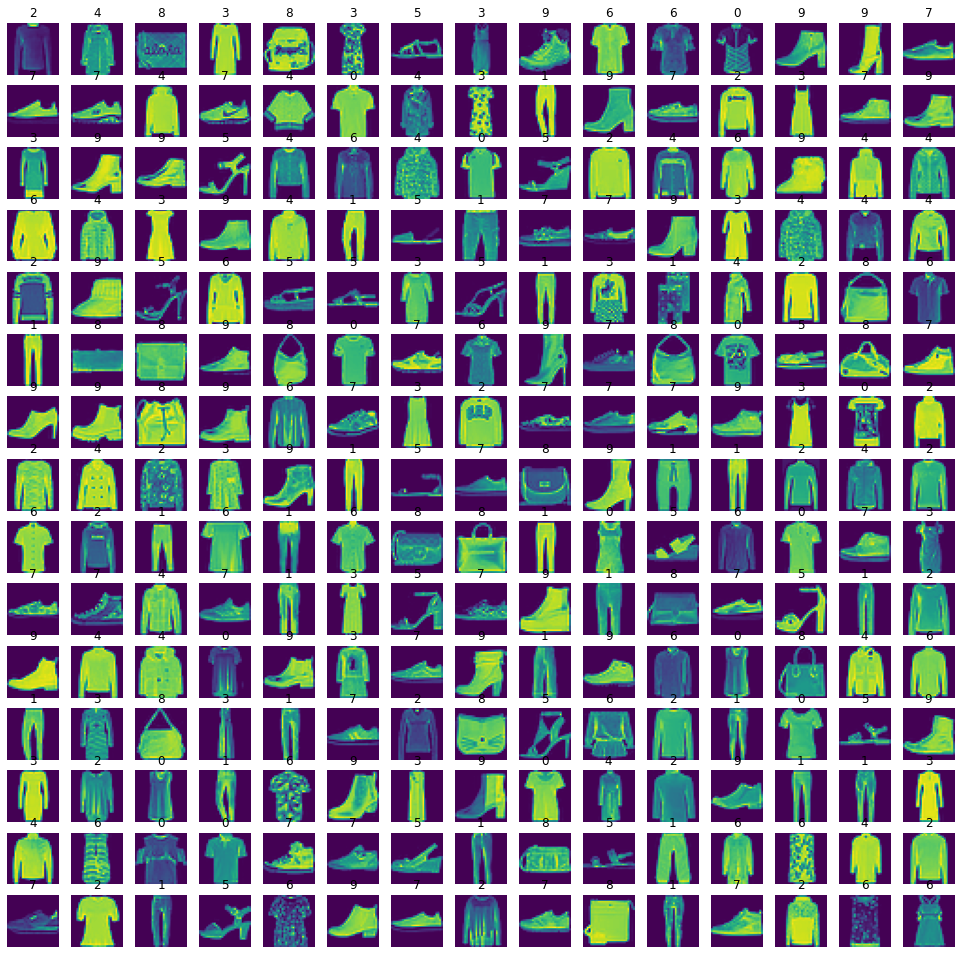

In [19]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 15
L_grid = 15

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(X_train) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in range(0, W_grid*L_grid):
    index = random.randint(0, n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')



# TASK #4: PERFORM DATA PREPROCESSING

In [20]:
# normalize data
X_train = X_train/255
X_test = X_test/255

In [22]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [45]:
# add some noise
def add_noise_to_image_dataset(dataset, noise_factor=0.3):
    noise_dataset = []
    for img in dataset:
        noisy_image = img + noise_factor * np.random.randn(*img.shape)
        noisy_image = np.clip(noisy_image, 0, 1)
        noise_dataset.append(noisy_image)
        
    return np.array(noise_dataset)

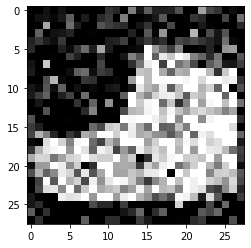

In [46]:
noise_factor = 0.3

noise_train_dataset = add_noise_to_image_dataset(X_train, noise_factor)


plt.imshow(noise_train_dataset[0], cmap='gray')

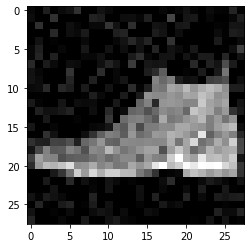

In [47]:
# add noise to testing dataset

noise_factor = 0.1

noise_test_dataset = add_noise_to_image_dataset(X_test , noise_factor)


plt.imshow(noise_test_dataset[0], cmap='gray')

# TASK #5: UNDERSTAND THE THEORY AND INTUITION BEHIND AUTOENCODERS

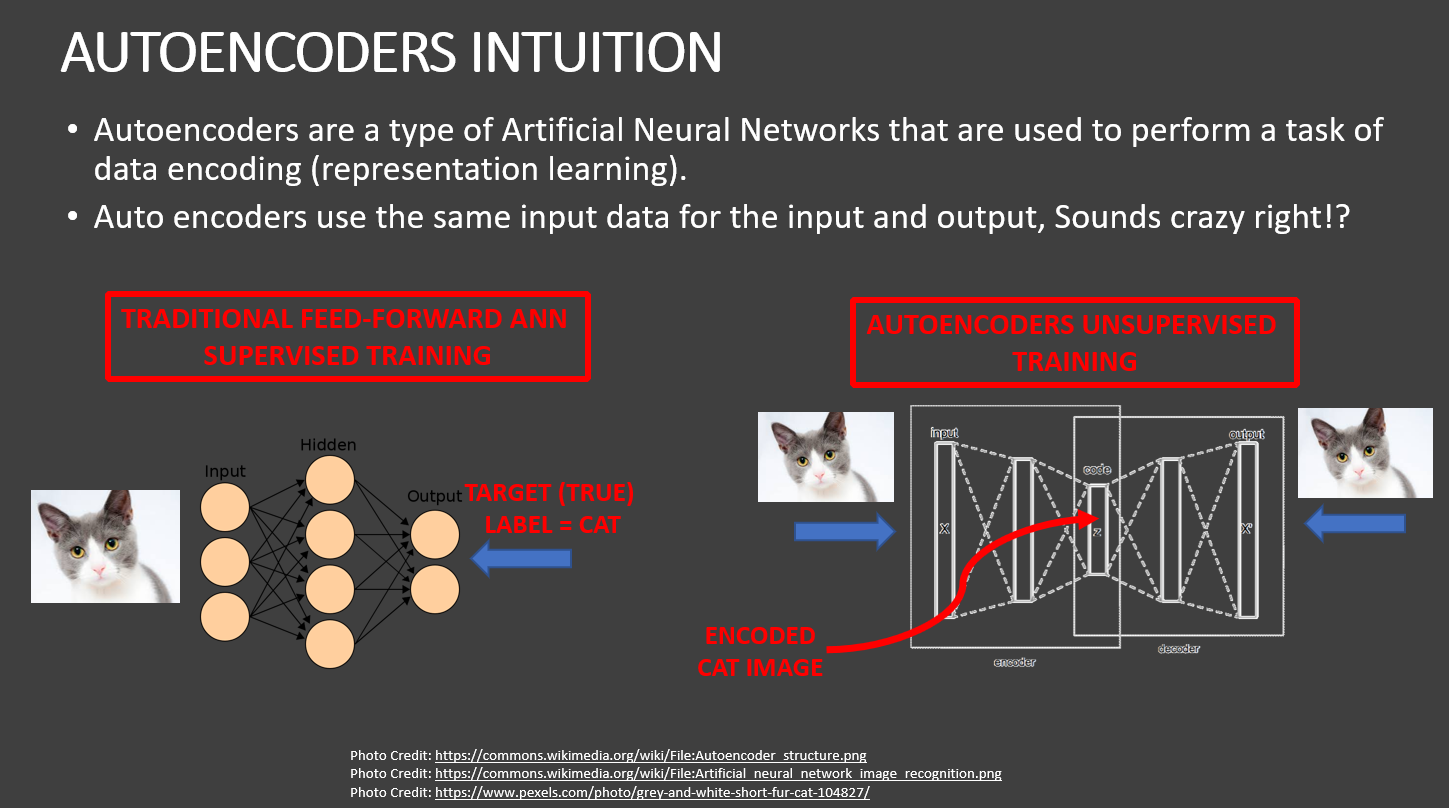

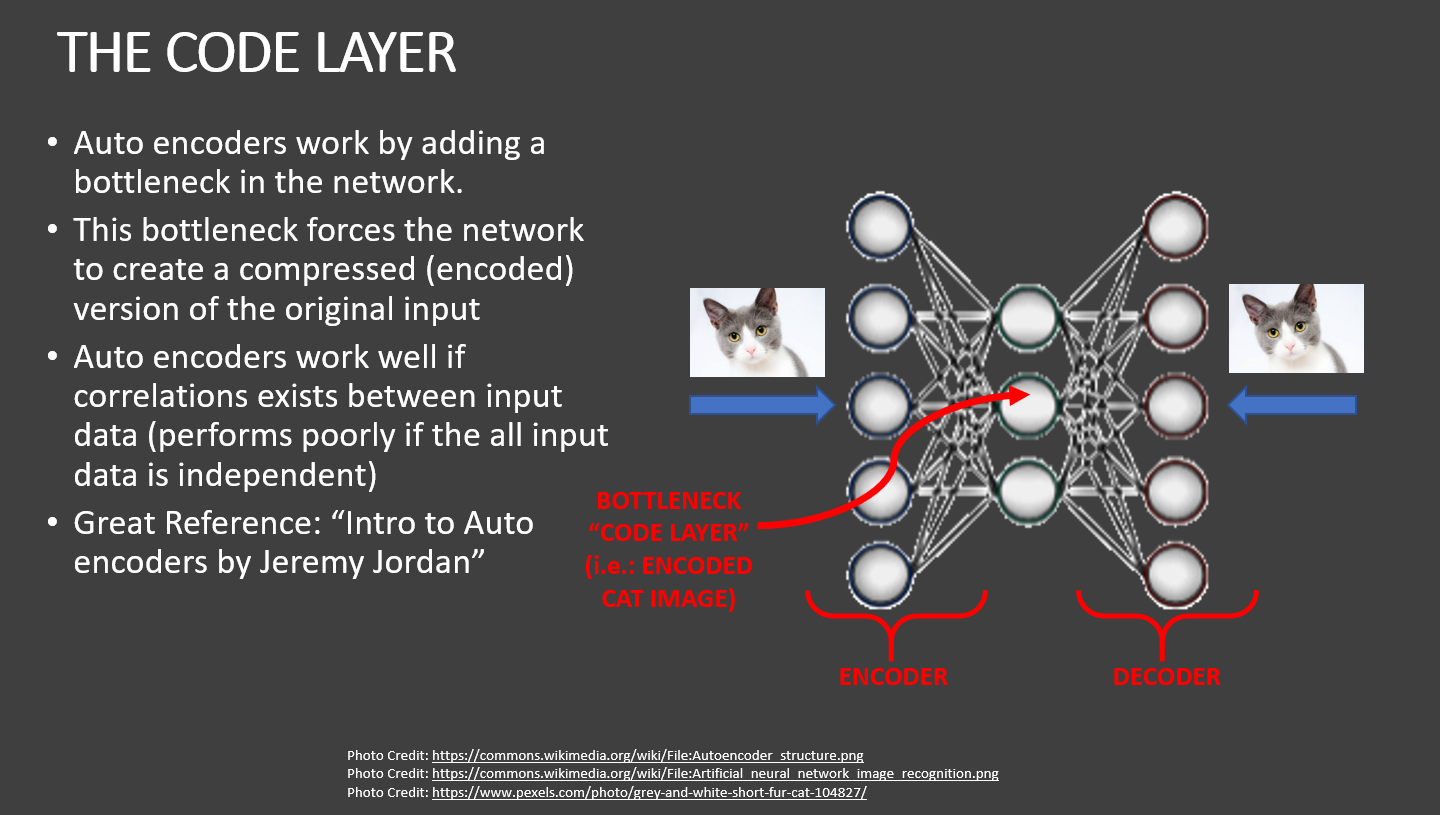

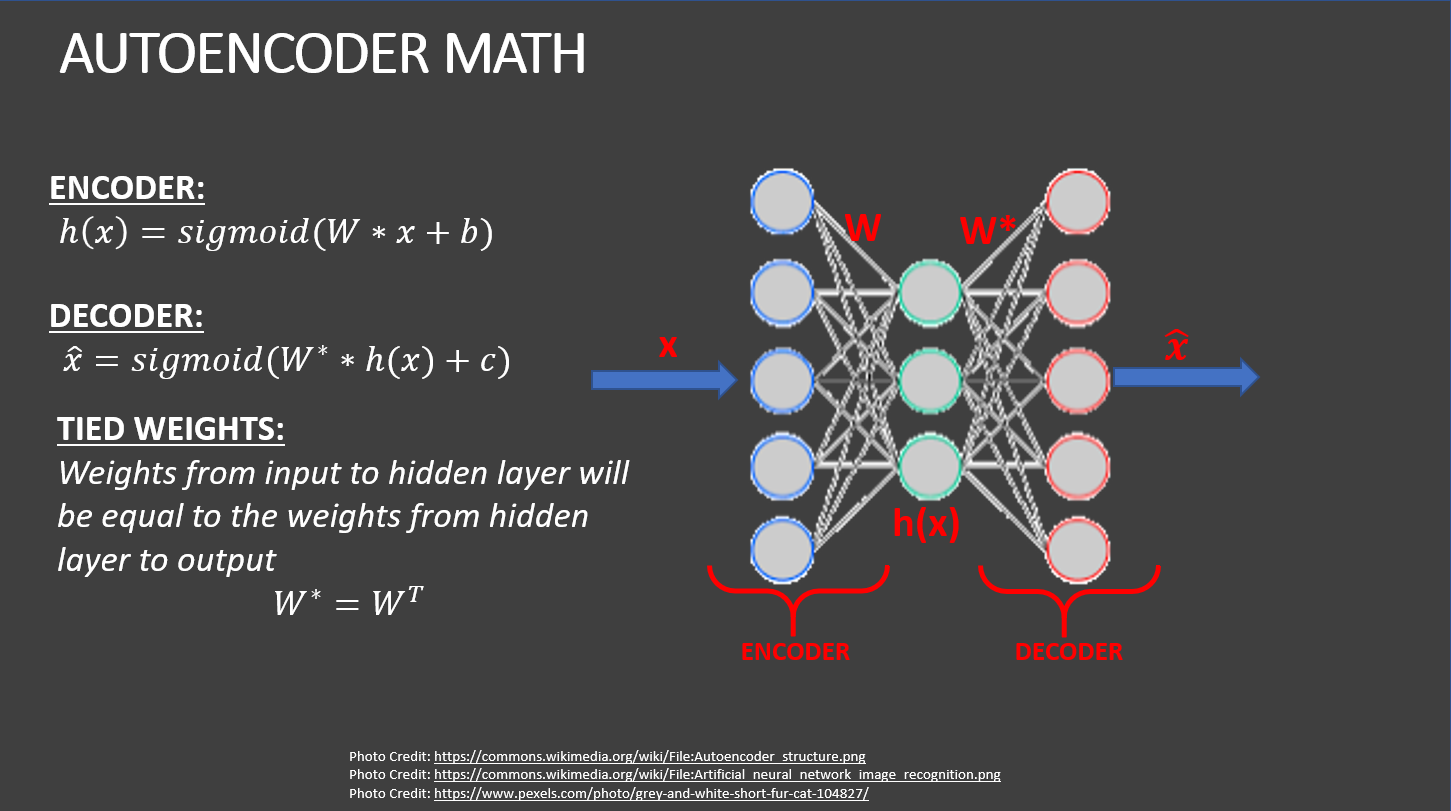

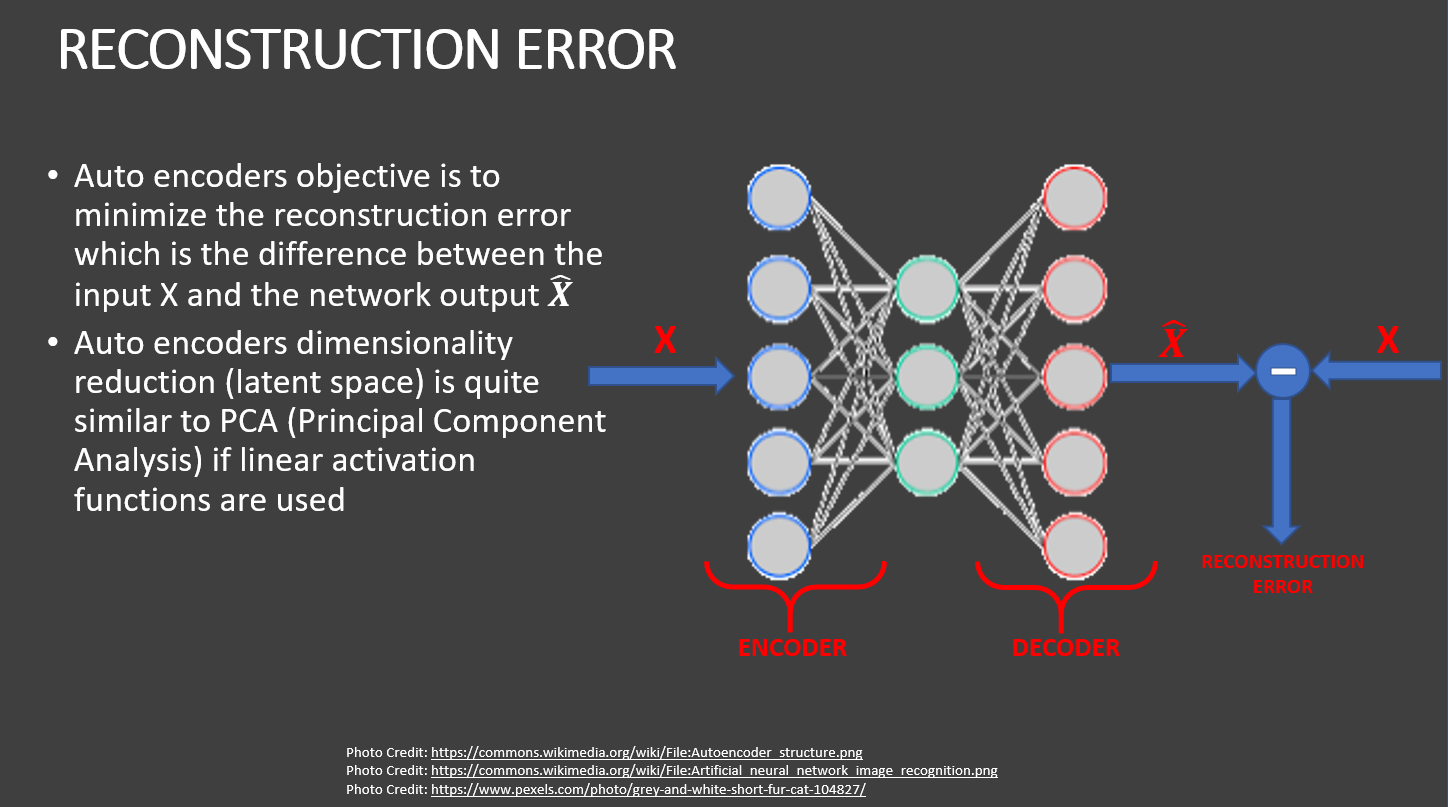

# TASK #6: BUILD AND TRAIN AUTOENCODER DEEP LEARNING MODEL

In [48]:
img_widht = X_train[0].shape[0]
img_height = X_train[0].shape[1]

In [55]:
autoencoder = tf.keras.models.Sequential()

# encoder
autoencoder.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, strides=2, padding='same', input_shape=(img_widht, img_height, 1)))
autoencoder.add(tf.keras.layers.Conv2D(filters=8, kernel_size=3, strides=2, padding='same'))

autoencoder.add(tf.keras.layers.Conv2D(filters=8, kernel_size=3, strides=1, padding='same'))

# decoder

autoencoder.add(tf.keras.layers.Conv2DTranspose(filters=16, kernel_size=3, strides=2, padding='same'))
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=3, strides=2, activation='sigmoid', padding='same'))

In [56]:
autoencoder.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.001))
autoencoder.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 7, 7, 8)           1160      
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
conv2d_transpose_9 (Conv2DTr (None, 14, 14, 16)        1168      
_________________________________________________________________
conv2d_transpose_10 (Conv2DT (None, 28, 28, 1)         145       
Total params: 3,217
Trainable params: 3,217
Non-trainable params: 0
_________________________________________________________________


In [57]:
autoencoder.fit(noise_train_dataset.reshape(-1, 28, 28, 1),
                X_train.reshape(-1, 28, 28, 1),
                epochs = 10,
                batch_size = 200,
                validation_data = (noise_test_dataset.reshape(-1, 28, 28, 1), X_test.reshape(-1, 28, 28, 1)))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 20s 334us/sample - loss: 0.3927 - val_loss: 0.3143
Epoch 2/10
60000/60000 [==============================] - 18s 294us/sample - loss: 0.3154 - val_loss: 0.3038
Epoch 3/10
60000/60000 [==============================] - 17s 291us/sample - loss: 0.3097 - val_loss: 0.2981
Epoch 4/10
60000/60000 [==============================] - 17s 288us/sample - loss: 0.3066 - val_loss: 0.2959
Epoch 5/10
60000/60000 [==============================] - 17s 277us/sample - loss: 0.3047 - val_loss: 0.2933
Epoch 6/10
60000/60000 [==============================] - 17s 278us/sample - loss: 0.3036 - val_loss: 0.2925
Epoch 7/10
60000/60000 [==============================] - 19s 325us/sample - loss: 0.3029 - val_loss: 0.2922
Epoch 8/10
60000/60000 [==============================] - 19s 309us/sample - loss: 0.3024 - val_loss: 0.2909
Epoch 9/10
60000/60000 [==============================] - 18s 295us/sample - l

# TASK #7: EVALUATE TRAINED MODEL PERFORMANCE

In [58]:
evaluation = autoencoder.evaluate(noise_test_dataset.reshape(-1, 28, 28, 1), X_test.reshape(-1, 28, 28, 1))

print("Test Accuracy : {:.3f}".format(evaluation))

10000/10000 [==============================] - 2s 200us/sample - loss: 0.2889
Test Accuracy : 0.289


In [59]:
predicted = autoencoder.predict(noise_test_dataset[:10].reshape(-1, 28, 28, 1))

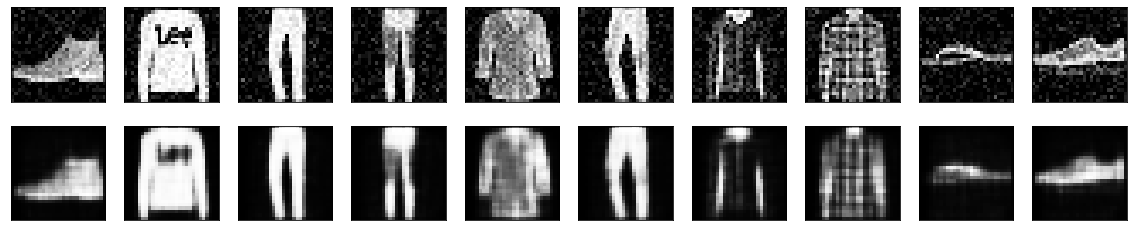

In [61]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
for images, row in zip([noise_test_dataset[:10], predicted], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

# EXCELLENT WORK!

- 0 = T-shirt/top
- 1 = Trouser
- 2 = Pullover
- 3 = Dress
- 4 = Coat
- 5 = Sandal
- 6 = Shirt
- 7 = Sneaker
- 8 = Bag
- 9 = Ankle boot